# Datalab Tutorial

In this tutorial, we'll do some exploratory data analysis in [BigQuery](https://cloud.google.com/bigquery/) using [Datalab](https://cloud.google.com/datalab/). 

## Requirements

1. If you haven't already, you may sign-up for the [free GCP trial credit](https://cloud.google.com/free/docs/frequently-asked-questions). [Before you begin](https://cloud.google.com/bigquery/quickstart-web-ui#before-you-begin), give this project any name you like and enable the BigQuery API. 
2. [Create a Datalab instance](https://cloud.google.com/datalab/docs/quickstarts#create_and_connect_to_a_cloud_datalab_instance). 

## NYC Yellow Taxi Data

We'll analyze BigQuery's public dataset on the NYC yellow taxi ride. BigQuery supports both standard and legacy SQL, which are demonstrated in this tutorial.

In [3]:
%sql -d standard
SELECT
  *
FROM
  `nyc-tlc.yellow.trips`
LIMIT
  5

vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,rate_code,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,imp_surcharge,tip_amount,tolls_amount,total_amount,store_and_fwd_flag
VTS,2009-02-21 11:18:00,2009-02-21 11:19:00,-73.907022,40.751902,-73.906735,40.751867,,2,0.06,CSH,2.5,0.0,,,0.0,0.0,2.5,
VTS,2009-11-02 22:28:00,2009-11-02 22:28:00,-73.808352,40.688103,-73.809093,40.689398,,2,0.14,CSH,2.5,0.5,0.5,,0.0,0.0,3.5,
VTS,2011-03-24 23:12:00,2011-03-24 23:12:00,-73.967637,40.761357,-73.967757,40.761223,1,1,0.0,CSH,2.5,0.5,0.5,,0.0,0.0,3.5,
VTS,2010-06-11 05:20:00,2010-06-11 05:20:00,-73.786248,40.644517,-73.786513,40.644857,1,1,0.07,CAS,2.5,0.5,0.5,,0.0,0.0,3.5,
VTS,2013-11-22 07:04:00,2013-11-22 07:05:00,-73.954522,40.78734,-73.954393,40.787322,1,1,0.01,CSH,2.5,0.0,0.5,,0.0,0.0,3.0,


Let's look at the table schema:

In [4]:
%bigquery schema --table nyc-tlc:yellow.trips

### 1. What is the most common pick-up time?

In [8]:
%%bq query -n pickup_time
WITH subquery AS (
  SELECT
    EXTRACT(HOUR FROM pickup_datetime) AS hour
  FROM
    `nyc-tlc.yellow.trips`)
SELECT
  Hour,
  COUNT(Hour) AS count
FROM
  subquery
GROUP BY
  Hour
ORDER BY
  count DESC

Let's name this query result *pickup_time* and reference it to create the chart below.

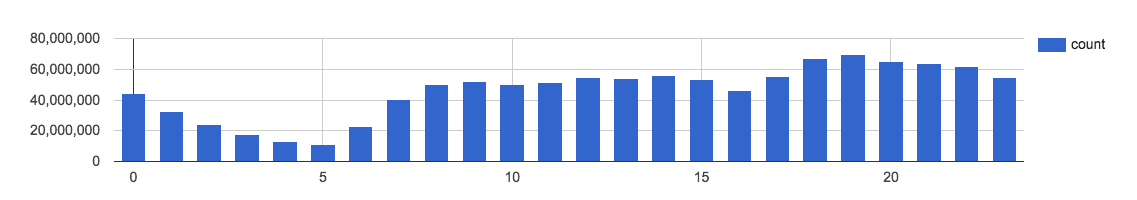

In [9]:
# Let's visualize the pick-up time distribution
%chart columns --data pickup_time

7:00 PM is the most common pick-up time.

### 2. Give the vendor distribution

The above queries were all standard SQL. This is an example of how legacy SQL can be executed in Datalab.

In [10]:
%%sql -d legacy -m vendor
SELECT
  TOP(vendor_id) AS vendor,
  COUNT(*) AS count
FROM
  [nyc-tlc:yellow.trips]

Let's label this query result *vendor* and reference it to create the following pie chart.

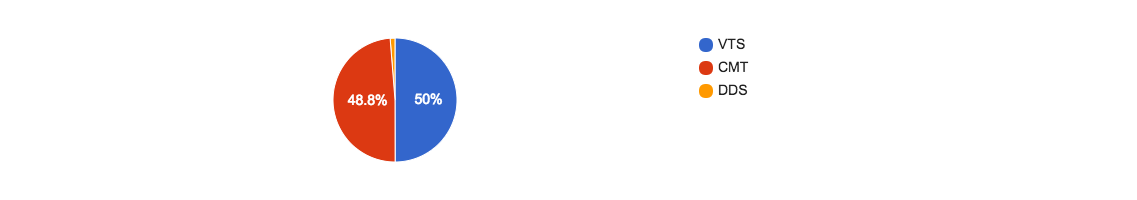

In [11]:
%chart pie --data vendor

### 3. Provide summary statistics on trip distance

In [12]:
%%sql -d legacy
SELECT
  QUANTILES(trip_distance, 5) AS quantile,
  MIN(trip_distance) AS min,
  MAX(trip_distance) AS max,
  AVG(trip_distance) AS avg,
  STDDEV(trip_distance) AS std_dev
FROM
  [nyc-tlc:yellow.trips]

quantile,min,max,avg,std_dev
-40840124.4,-40840124.4,59016609.3,5.10838742509,5114.54193218
0.9,-40840124.4,59016609.3,5.10838742509,5114.54193218
1.53,-40840124.4,59016609.3,5.10838742509,5114.54193218
2.7,-40840124.4,59016609.3,5.10838742509,5114.54193218
59016609.3,-40840124.4,59016609.3,5.10838742509,5114.54193218


Datalab also supports LaTeX rendering. The min distance is $-4.08\times10^7$ miles (interesting!), $Q_1$ is 0.9 miles and $Q_3$ is 2.7 miles. The trip distance is skewed to the right since the mean is greater than the median (1.54 miles).

### 4. Let's plot the pickup location

In [13]:
%%bq query -n pickup_location
SELECT
  pickup_latitude,
  pickup_longitude
FROM
  `nyc-tlc.yellow.trips`
LIMIT
  10

In [25]:
%%chart map --data pickup_location

### 4. Could distance and fare amount explain the payment disputes for rides from the JFK airport?

In [28]:
%%bq query -n dispute
SELECT
  trip_distance,
  fare_amount
FROM
  `nyc-tlc.yellow.trips`
WHERE
  rate_code = "2"
  AND payment_type = "DIS"

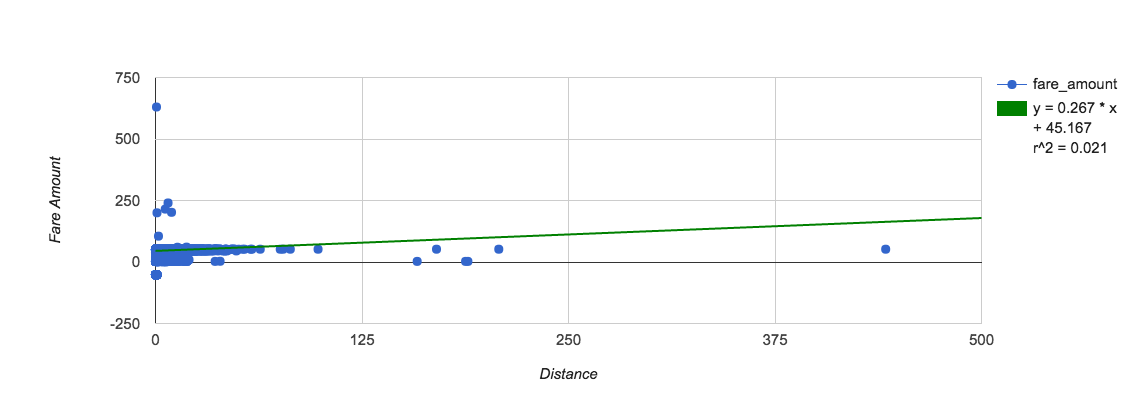

In [29]:
%%chart scatter --data dispute
height: 400
hAxis:
  title: Distance
vAxis:
  title: Fare Amount
trendlines:
  0:
    type: line
    color: green
    showR2: true
    visibleInLegend: true

There seems to be a weak positive relationship ($r = +\sqrt{r^2} = 0.145$) between the trip distance and the fare amount for taxis that picked up rides from the airport and had payment disputes.

## How can you share your notebook?

1. To download your notebook, go to **Notebook > Download** in Datalab. 
2. To push your notebook to your GitHub repo, type the usual git commands in a cell precendented with an exclamation mark, like so:

In [ ]:
!git add * 
!git commit -m "your message"
!git push

## Clean-up

[Delete your Datalab VM instance](https://cloud.google.com/datalab/docs/quickstarts#clean-up) to avoid incurring charges to your account.

## Reference
1. [BigQuery standard SQL query list](https://cloud.google.com/bigquery/docs/reference/standard-sql/functions-and-operators)
2. [BigQuery legacy SQL query list](https://cloud.google.com/bigquery/docs/reference/legacy-sql)
2. Datalab [data maneuvering commands](http://googledatalab.github.io/pydatalab/google.datalab%20Commands.html) and [querying commands](http://googledatalab.github.io/pydatalab/datalab%20Commands.html)
3. [How to integrate BigQuery with Datalab and Pandas?](https://cloud.google.com/bigquery/docs/visualize-datalab#pandas_dataframes)